Author: Lijing Wang, lijing52@stanford.edu; David Zhen Yin, yinzhen@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)


## Load 2 diamond datasets

In the previous notebook, we covered some basic statistical concepts, and showed why basic statistics may not work well when dealing with extreme values. In this notebook, we will learn how to use Extreme Value theory to analyze our diamond datasets. 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/lijingwang/GEOLSCI6_EARTHSYS100A.git

Cloning into 'GEOLSCI6_EARTHSYS100A'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 221 (delta 5), reused 9 (delta 2), pack-reused 203
Receiving objects: 100% (221/221), 22.70 MiB | 18.15 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
# Import extreme value sampling functions: log-normal, log-hyperbolic
import sys
sys.path.append('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond')
from extreme_value_sampling import *

In [ ]:
# Load 2 diamond datasets: size for each mined diamond
## Diamond dataset 1, number of diamonds: 1,000
diamond_dataset1 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond/diamond_dataset_1.txt')
## Diamond dataset 2, number of diamonds: 500
diamond_dataset2 = np.loadtxt('/content/GEOLSCI6_EARTHSYS100A/EVS_diamond/diamond_dataset_2.txt')

## Central Limit Theorem

Before we get into extreme value statistics, let's first learn a theorem in classical statistics through experiments. 

This theorem, Central limit theorem,  tells us a **consistent behavior** of many distributions under certain conditions. 


Central limit theorem (CLT) tells us: 
*   Mean of samples from any distribution themselves are normally
distributed.

Mathematically, central limit theorem states:

*   If we sample independent and identically distributed (i.i.d.) random variables $X_1,X_2, ...$, such that $E(X_i) = \mu $, $Var(X_i) = \sigma^2$, then sampled mean $\bar{X} = \frac{1}{n}\sum_{i = 1}^{n}X_i$ is normally distributed: 

$$\bar{X} \sim N(\mu, \frac{\sigma^2}{n}), \text{as}\ n \rightarrow \infty $$

In a more plain language, CLT tells us:

1) if we sample $n$ times from a given distribution and calculate the mean, $\bar{X}$ 

2) repeat 1) $b$ times, and get different estimations of $\bar{X}$ 

3) the $b$ different empirical means are normally distributed

In the lectures, we mentioned the central limit theorem or CLT, a theorem that states, under certain conditions, that averages tend to show symmetric historgrams or distributions. In fact, they tend to become Gaussian distributed. Let's here run a few exercises with the computer to show how that works. 

(Tests below are computed in advance, because running 1) $b$ times takes several minutes.)

**Example 1**. A skewed distribution (log-normal distribution)

Here we use a distribution similar to Deposit 1 to test the CLT theorem. (Note that in the real world, we couldn't easily know which distribution our deposit belongs to. This is just for practice.)



**Plot 1.   Histogram of sampled values:**

![CLT1_example_fig1.png](https://drive.google.com/uc?export=view&id=1Liq4KmY-0bBLYjZswO4FIimxSbiJVB6V)

Given this histogram, we can tell the distribution is skewed, but not having a super long tail. Our distribution is definitely not a normal distribution. But how about the mean? Here we use a computer to simulate sampling in the real world. It would be as if you has access to all the millions of stones in a diamond deposts and you could make many parcels of say 20 stones, then calculate the average of all these parcels. What would the histogram of these parcels look like?

**Plot 2.   Expectation of empirical means and 95% confidence interval:**

![CLT1_example_fig2.png](https://drive.google.com/uc?export=view&id=1XKgR7DObTiQ3HGJWxyOEB7B8jcmDR7wj)

In a computer experiment (termed Monte Carlo) we sample $b = 1,000$ times given each different samples size (parcels of diamonds) $n $ = 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000. The empirical mean estimated from larger $n$ has smaller uncertainty/narrower 95% confidence interval. Expectations of empirical means for different $n$ are almost the same, converging to a finite value. Here the expectation of empirical means equals to the mean of empirical means. 

![CLT1_example_fig7.png](https://drive.google.com/uc?export=view&id=1od0-xb_IpmcfJDDW9fTvMvNV-Vvwp4zo)

If we plot $\frac{1}{\sqrt(n)}$ v.s. estimated mean and confidence interval, we can see a linear relationship between the standard deviation $\sigma_{\bar{X}}$ and $\frac{1}{\sqrt(n)}$: 

$$\sigma_{\bar{X}}  \sim \frac{\sigma}{\sqrt(n)}\$$


**Plot 3.  Histrogram of empirical means, n = 10,000:**

We see the statistical convergence from Plot 2. How about the distribution of empirical mean? Here we take $n = 10,000$ as an example: 
![CLT1_example_fig3.png](https://drive.google.com/uc?export=view&id=1iMlxg4lo_cWRjbuUgAqAM4l65-COFrmE)

This distribution is roughly a "bell shape", corresponding to the normal distribution. So CLT tells us that even though the original distribution is far away from normal distribution, mean of the distribution is actually normal distributed. 

This distribution is in fact the log-normal distribution, with finite mean and variance. 


---





However, CLT does not work if our distribution has **no mean**. For example, let's assume we have a very "long and fat tail" distribution, which is common in extreme value statistics.  

**Example 2.** A skewed distribution with a very "long and fat tail"

**Plot 1. Histogram of sampled values:**
![CLT1_example_fig4.png](https://drive.google.com/uc?export=view&id=1VcsCnVh3YZN_54Oi7koQM_bkpMMOpFqo)

This is also a skewed distribution, with a very long tail. Our sample size is 500. The largest 10 values are: 

26386.86,  4473.31,  3352.23,  1398.63,  1335.8 , 758.48, 757.48, 692., 609.78, 394.77

Therefore, if we miss the largest value, the change of empirical mean will be substantial. If we get more samples, can we estimate the mean more robustly like Example 1? Is there statistical convergence? Does the mean exist?

**Plot 2: Median of empirical means and 95% confidence interval**
![CLT1_example_fig5.png](https://drive.google.com/uc?export=view&id=1RTRkToMezJMikE4pZWeN0aPR0Hwsz9O0)

CLT theorem is not applied to this distribution. There is no statistical convergence any more. With the increase of sampled size $n$, the expectation of empirical mean also increases, so as the confidence interval. In fact, if we increase size $n \rightarrow \infty$, we will sample extreme large, even infinite values. This distribution (Pareto distribution, $0< \alpha \leq 1$), in theory, has an infinite mean.

**Plot 3.  Histrogram of empirical means, n = 5,000:**

![CLT1_example_fig6.png](https://drive.google.com/uc?export=view&id=1lyv1J9z10LXVRom1fVaVGKl5gKk4dELn)

This empirical mean distribution is skewed, not centered around any mean value. 




---



From above analysis, we show that even these two distributions are both skewed distribution, their tails are statistically different. So how should we quantify the tails' statistics? We will learn that from extreme value theory in this notebook. 

## Extreme Value Statistics

Because our data is limited (either in time or space), it is unlikely that we have observed all extreme values. Therefore, the main objective of extreme value theory (EVT) is to model these valuable extremes and extrapolate beyond the highest sample value, thereby make being able predictions on extremes. 

We are going to **1) make assumptions of distributions of extremes, 2) fit the distribution using observed data.**

And the log-normal distribution fitting in the last notebook is one example. 

1) we assume the distribution of sampled value is log-normal distribution 

2) we estimate mean $\mu$ and variance $\sigma^2$ after taking logarihm of our samples.

However, Log-normal distribution is just one possible model. There are many possibilities of long-tail distributions: Pareto distribution, log-hyperbolic distribution, etc...

In order to estimate not yet observed extremes in the data, we need bet on the fact that there is some **consistent behavior** as we take increasingly larger values, without needing to rely on specific forms (normal, lognormal). This consistent behavior should be similar to CLT we learnt earlier.

There are two ways of looking a consistent behavior of extremes:
1.   Block Maxima: targeting on the distribution of maxima
2.   Peaks Over Threshold: targeting on the distribution of exceedances over threhold, i.e. distribution larger than a threhold

## Method 1: Block Maxima 

Since we are interested in extremes, the first apparent thing to do is to focus on maxima. Here we re not interested on how the middle sample values behave but how the maximum behaves. The problem of course is that there is only one maximum in our dataset, so how can we really study this?

One way to achive this is to make blocks of data, then see what happens when we look at the maximum in each block. For diamonds it would mean making different parcels of diamonds. 

Let's first take a look on the distribution of maxima on some distributions we have already known: **normal distribution and exponential distribution**. The goal is to find some consistent maxima behavior among different distributions. 

### Distribution of Maxima

We would like to 1) sample $n$ values from normal/exponential distributions, 2) take the maxima, and 3) repeat $b$ times. In this way, we get a histogram of $b$ maxima values. We can repeat this for various $n$.


Probability density function for normal distribution and exponential distribution:

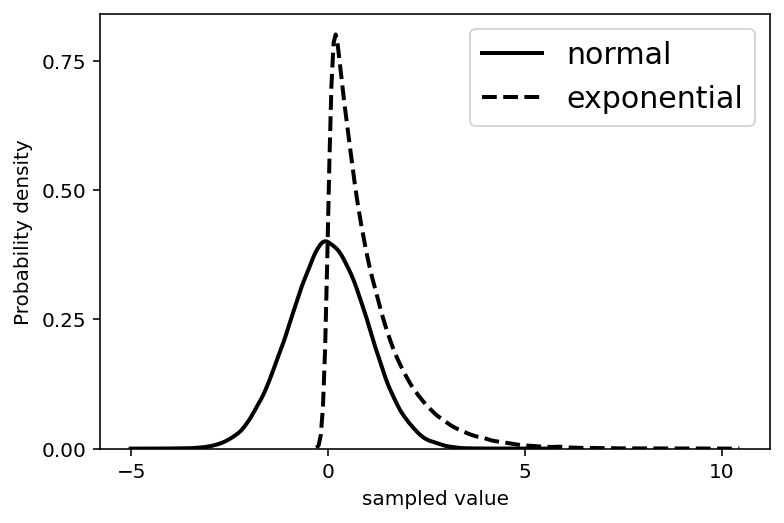

In [ ]:
plt.locator_params(nbins = 4)
matplotlib.rcParams.update({'font.size': 15})

## sampled values from normal distribution
normal_samples = np.random.normal(size = 100000)

## sampled values from exponential distribution
exponential_samples = np.random.exponential(size = 100000)

## plot
sns.kdeplot(normal_samples,label = 'normal',linestyle = 'solid', lw=2,color = 'k') 
sns.kdeplot(exponential_samples,label = 'exponential',linestyle = 'dashed', lw=2,color = 'k')
plt.xlabel('sampled value')
plt.ylabel('Probability density')
plt.legend()

Normal distribution and exponential distribution are completely different distributed. 


How about their maxima?

In [ ]:
# --- take about 10s ---
n = np.array([1,10,10000,100000])
b = 1000

## normal distribution: sample b maxima, block size is n
max_value_normal = np.zeros((len(n), b))
for size_index, size_value in enumerate(n):
  for mc_turn in range(b):
      max_value_normal[size_index,mc_turn] = np.max(np.random.normal(size = size_value))

## exponential distribution: sample b maxima, block size is n 
max_value_exp = np.zeros((len(n), b))
for size_index, size_value in enumerate(n):
  for mc_turn in range(b):
      max_value_exp[size_index,mc_turn] = np.max(np.random.exponential(size = size_value))

Text(0.5, 1.0, 'Distribution of maxima, normal')

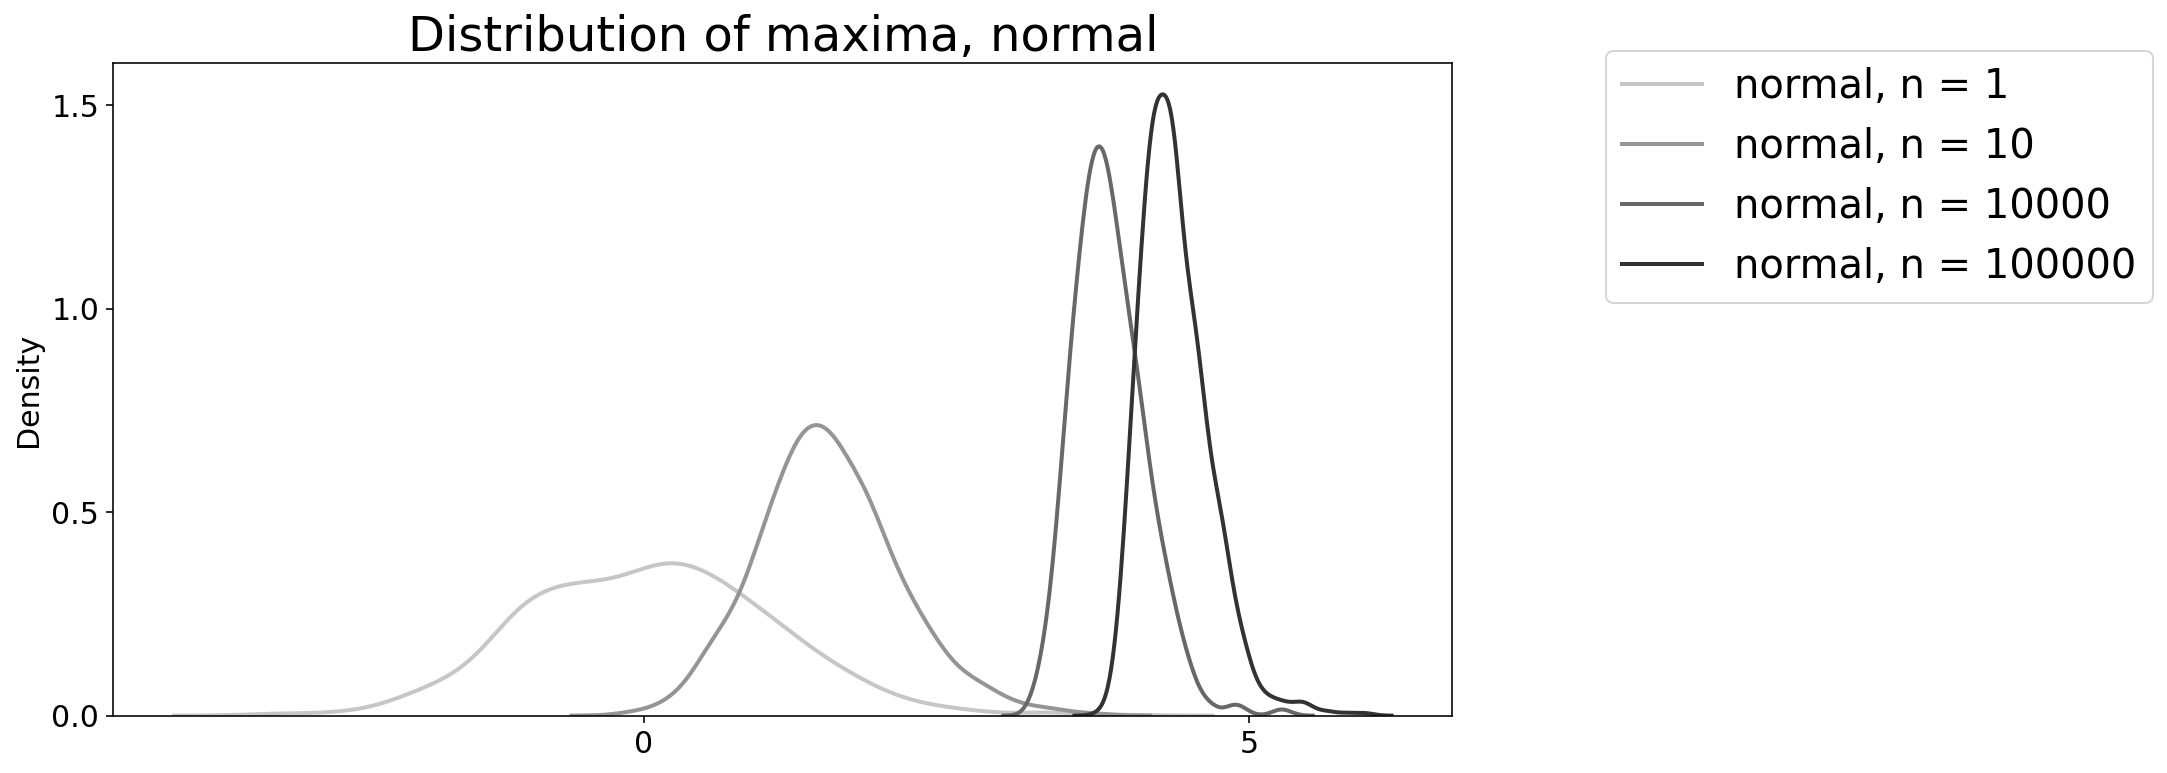

In [ ]:
fig, ax = plt.subplots(figsize = (12,6)) 
plt.locator_params(nbins=4)
matplotlib.rcParams.update({'font.size': 20})
pal = sns.color_palette("Greys", len(n)+1)
for size_index in range(len(n)):
    sns.kdeplot(max_value_normal[size_index,:], label = 'normal, n = '+str(n[size_index]), color=pal[size_index+1], linestyle = 'solid', lw=2)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Distribution of maxima, normal')

Text(0.5, 1.0, 'Distribution of maxima, exponential')

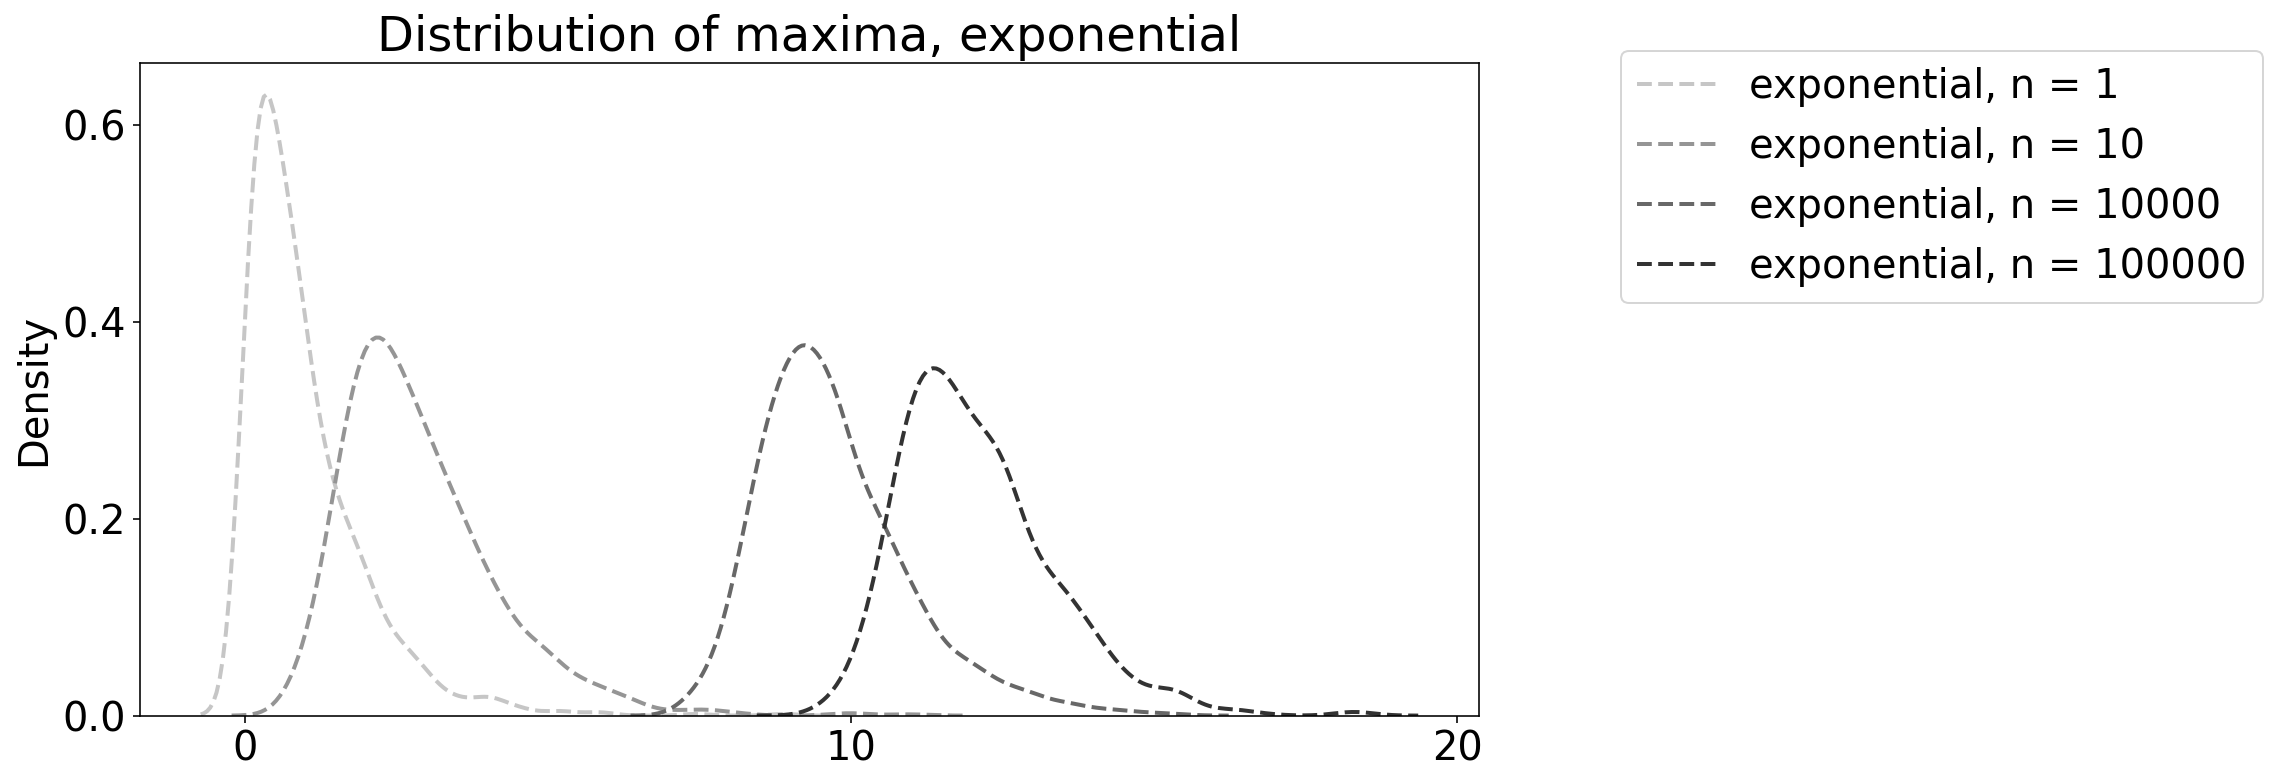

In [ ]:
fig, ax = plt.subplots(figsize = (12,6)) 
plt.locator_params(nbins=4)
matplotlib.rcParams.update({'font.size': 20})
pal = sns.color_palette("Greys", len(n)+1)
for size_index in range(len(n)):
    sns.kdeplot(max_value_exp[size_index,:], label = 'exponential, n = '+str(n[size_index]), color=pal[size_index+1], linestyle = 'dashed', lw=2)
plt.legend(bbox_to_anchor=(1.6, 1.05))
plt.title('Distribution of maxima, exponential')

Their maxima distributions are still quite different. Theoretically as we increase the block size $n$, we will get a better estimation of distribution of maxima. 

If we however standardize the maxima histograms shown above, and overlap the plot:

In [ ]:
# standardize the estimated maxima by empirical mean and variance
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(max_value_normal.T)
max_value_normal_scaled = scaler.transform(max_value_normal.T).T
scaler = preprocessing.StandardScaler().fit(max_value_exp.T)
max_value_exp_scaled = scaler.transform(max_value_exp.T).T

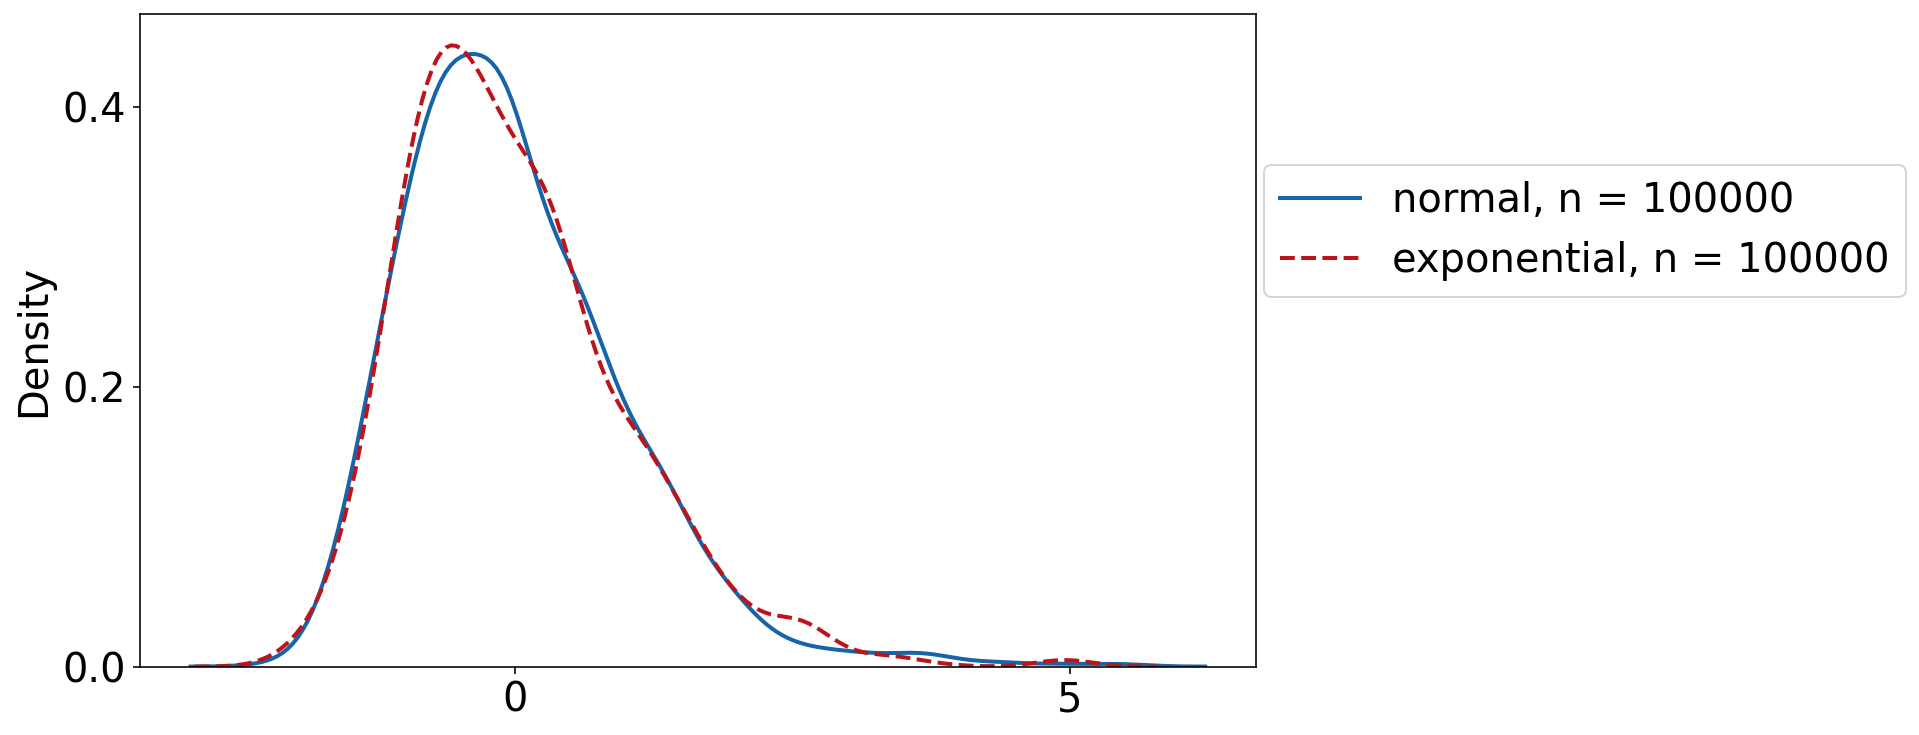

In [ ]:
fig, ax = plt.subplots(figsize = (10,6)) 
plt.locator_params(nbins=4)
matplotlib.rcParams.update({'font.size': 20})
pal = sns.color_palette("Blues", len(n))
for size_index in np.array([3]):
    sns.kdeplot(max_value_normal_scaled[size_index,:], label = 'normal, n = '+str(n[size_index]), color=pal[size_index], linestyle = 'solid', lw=2)
pal = sns.color_palette("Reds", len(n))
for size_index in np.array([3]):
    sns.kdeplot(max_value_exp_scaled[size_index,:], label = 'exponential, n = '+str(n[size_index]), color=pal[size_index], linestyle = 'dashed', lw=2)
plt.legend(bbox_to_anchor=(1.6, 0.8))
#plt.title('Distribution of maxima, normal and exponential after standardization')


Now we notice that if $n$ is large, here $n$ is 100,000, **distributions of exponential maxima and normal maxima are quite similar to each other.**

So even though the distributions are different, their maxima distributions could have same shapes. 

Does that sound familar? Yes, that is the "Central Limit Theorem" for maxima: Extremal types theorem.



**Exercise**: How about the distribution of maxima for log-normal distribution? Visualize this distribution. And compare this maxima distribution with exponential maxima and normal maxima.

In practice, this Block Maxima method requires a large dataset. We only have a limited amount of samples to estimate the maxima distribution. As we mentioned earlier, we only have one maxima value for the entire dataset. That's why in practice, we need to divide our existing datasets into many blocks, and analyze the maxima distribution sampled from each block. 

If we have a small dataset $N$, and select a larger block size $n$, our maxima samples will be just few samples $N/n$, and the estimated GEV distribution will have a large uncertainty. 

For example, in diamond dataset 1, in total we have $N = 1,000$ samples. If the block size is $n = 100$, we will divide our dataset into 1,000/100 = 10 blocks. Then our sample size for maxima will be only 10. 

Therefore, block maxima will only use a small amount of our dataset, which is proportional to $1/n$, $n$ is the block size. 



---



### Generalized extreme value distribution (GEV)

In fact, the distributions of exponential maxima, normal maxima, or any converged maxima can be represented by the Generalized Extreme Value distribution: 

\begin{equation*}
P(\max\{X_1,..., X_n\}\leq x) = GEV(x) = \begin{cases}
\exp \left( -\left( 1+\xi\frac{(x-\mu)}{\sigma}\right) ^{-\frac{1}{\xi}}\right) & \xi \neq 0 \\
\exp \left( -\exp\left(-\frac{(x-\mu)}{\sigma}\right)\right) & \xi = 0
\end{cases}
\end{equation*}


$\xi$ is the **extreme value index**, or the shape parameter of distribution of maxima. It controls the thickness of the tail distribution. $\mu$ is a location parameter, $\sigma$ is a scale parameter. 

Actually, there are 3 distributions from GEV family: 

*   If $\xi < 0$, the distribution is a *Weibull* GEV distribution. This tail of the distribution is thinier, with a finite upper bound. 
*   If $\xi = 0$, the distribution is a *Gumbel* GEV distribution. This tail falls exponentially, with no upper limit
*   If $\xi > 0$, the distribution is a *Fréchet* GEV distribution. This tail of the distribution is heavier than $\xi = 0$, with no upper limit.




![GEV_example.png](https://drive.google.com/uc?export=view&id=1ygLuMTuzH9LYrHaPZfLgSk5OUsLWyZfX)


Notes and figures adapted from: [Extreme value theory](https://www.acted.co.uk/Docs/Samples/SP9%20Course%20Notes%20-%20Sample%20Chapter.pdf) .



Another interesting feature for extreme values is time. 

For example, we document when volcano erupted and the magnitude of eruption. We can then seperate our datasets into different blocks using time, see years, and apply block maxima method to fit the GEV distribution. 

We will cover volcano datasets in the next notebook, and investigate frequency of occurence of extremes. 

---



### Summary of Block Maxima
*   Generalized extreme value distribution reflects the theoretical distribution of maxima.
*   To get the maxima distribution, we need to do blocking. 
*   $\xi$, extreme value index, reflects how thick the tail distribution of maxima is.
*   Parameters for the GEV distribution can be estimated by maximum likelihood estimation or L-moments method. 












## Method 2: Peaks Over Threshold (POT)

A second method is to focus on exceedances over threshold, not a single maxima value. Therefore, POT method will use more data to fit extreme value distribution. This is the more appropriate approach for our diamond dataset

### Distribution of exceedances

Let's again find the consistent behavior of distribution over threhold $u$. 

In [ ]:
## sampled values from normal distribution
normal_samples = np.random.normal(size = 100000)

## sampled values from exponential distribution
exponential_samples = np.random.exponential(size = 100000)

Text(0.5, 1.0, 'Distribution of POT, normal')

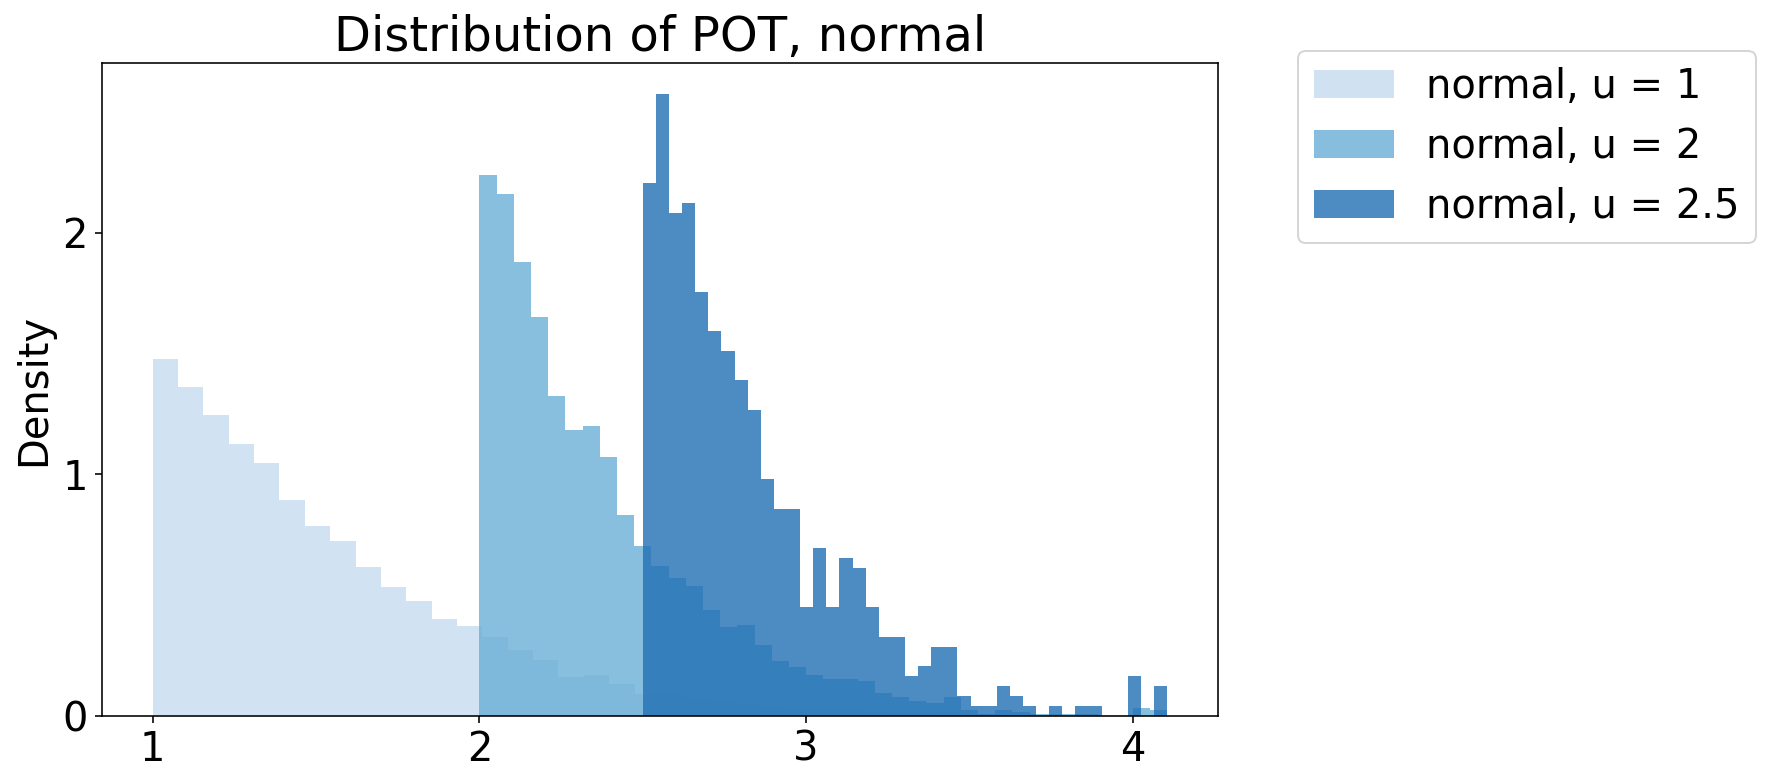

In [ ]:
fig, ax = plt.subplots(figsize = (10,6)) 
u_list = [1,2,2.5]
plt.locator_params(nbins=4)
pal = sns.color_palette("Blues", len(u_list))
for i,u in enumerate(u_list):
    plt.hist(normal_samples[normal_samples>u], label = 'normal, u = '+str(u), color=pal[i],density = True,histtype='stepfilled', bins = 40,alpha = 0.8)
    #sns.kdeplot(normal_samples[normal_samples>u], label = 'normal, u = '+str(u), color=pal[i])
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.ylabel('Density')
plt.title('Distribution of POT, normal')

Text(0.5, 1.0, 'Distribution of POT, exponential')

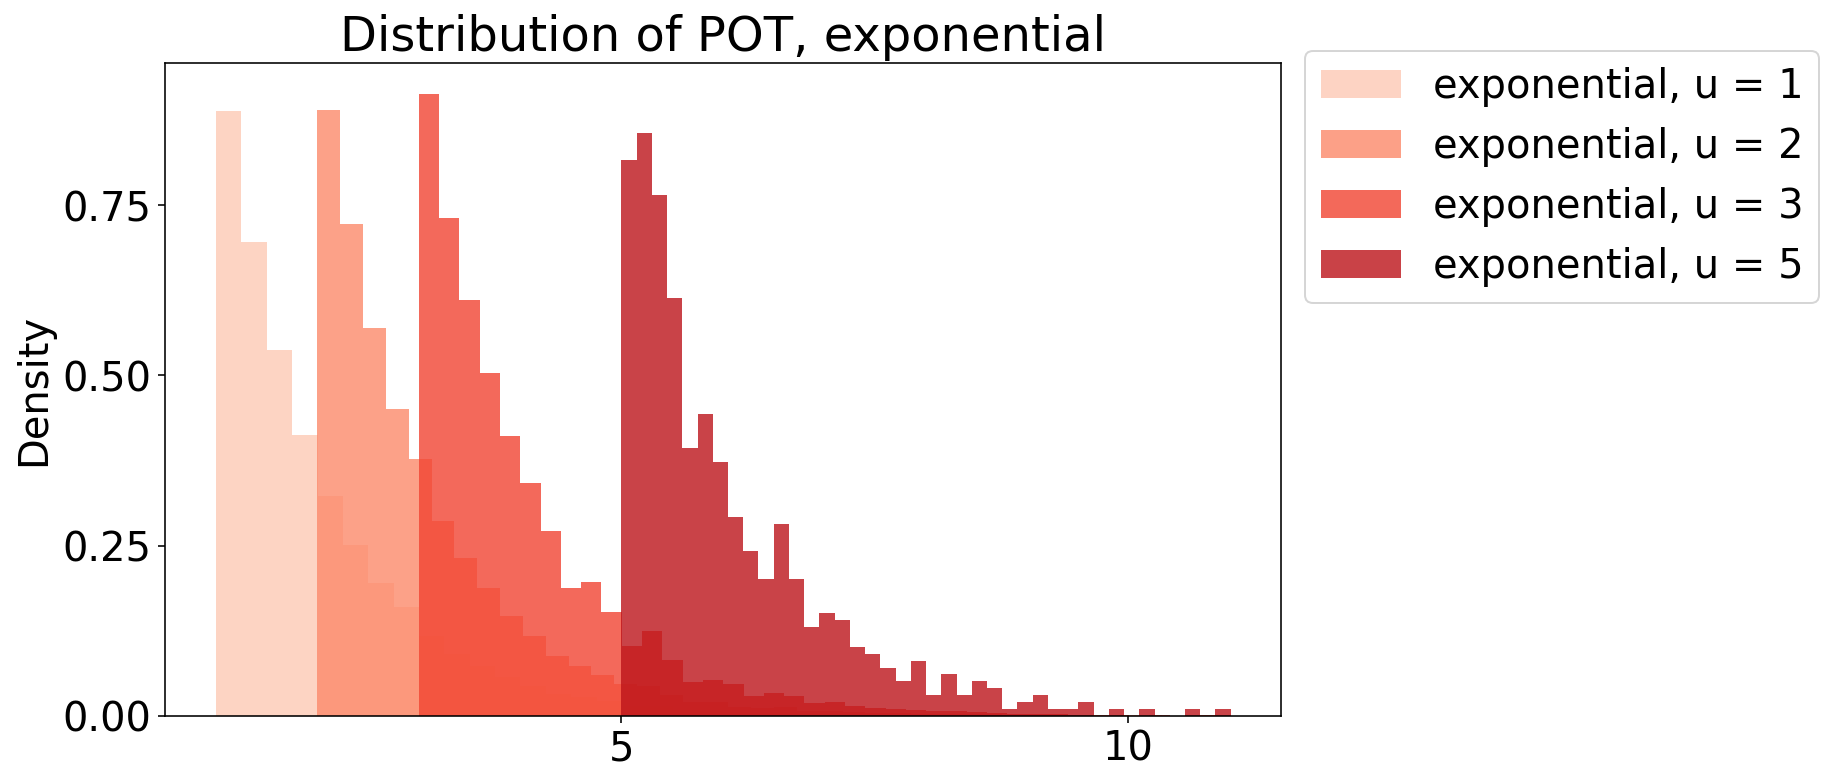

In [ ]:
fig, ax = plt.subplots(figsize = (10,6)) 
u_list = [1,2,3,5]
plt.locator_params(nbins=4)
pal = sns.color_palette("Reds", len(u_list))
for i,u in enumerate(u_list):
    plt.hist(exponential_samples[exponential_samples>u], label = 'exponential, u = '+str(u), color=pal[i],density = True,bins = 40,alpha = 0.8)
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.ylabel('Density')
plt.title('Distribution of POT, exponential')

We can see the decay pattern are sort of similar, for both exceedances of normal distribution and exponential distribution. Again, let's standardize our exceedances and compare exceedances distribution of normal and exponential:

Text(0, 0.5, 'Density')

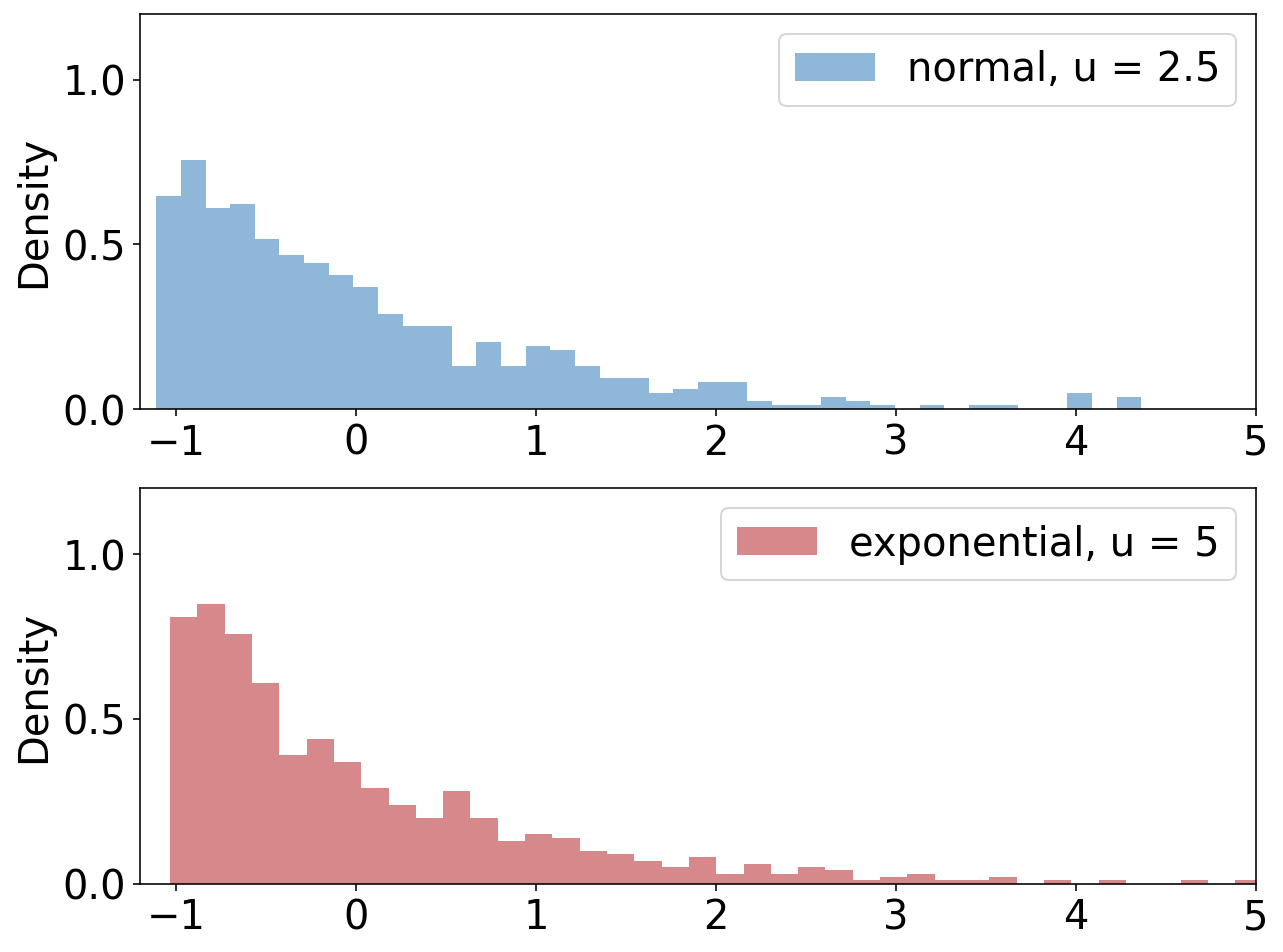

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
 
plt.locator_params(nbins=4)
plt.subplot(211)
pal = sns.color_palette("Blues", 3)
u = 2.5
plt.hist(preprocessing.StandardScaler().fit_transform(normal_samples[normal_samples>u].reshape(-1,1)).reshape(-1), 
         label = 'normal, u = '+str(u), color=pal[-1],density = True, bins = 40,alpha = 0.5)
plt.legend()
plt.ylabel('Density')
plt.ylim(0,1.2)
plt.xlim(-1.2,5)

plt.subplot(212)
pal = sns.color_palette("Reds", 5)
u = 5
plt.hist(preprocessing.StandardScaler().fit_transform(exponential_samples[exponential_samples>u].reshape(-1,1)).reshape(-1), 
         label = 'exponential, u = '+str(u), color=pal[-1],density = True,bins = 40,alpha = 0.5)

plt.legend()
plt.ylim(0,1.2)
plt.xlim(-1.2,5)
plt.ylabel('Density')

We again see the consistent behavior. In fact, distributions of exponential exceedances, normal exceedances, or any other exceedances, can all be represented by the Generalized Pareto distribution:



### Generalized pareto distribution (GPD)

If we have the threshold $u$, the excess distribution over the threshold $u$ has the distribution function:
$$ F_u(y)= P(X\leq u+y|X>u) = \frac{F_X(u+y) - F_X(u)}{1-F_X(u)}$$
where
$y\geq 0$.

Then if $u\rightarrow \infty$, no matter the underlying distribution of $X$, this distribution function (cdf) $F_u(y)$ will converge to a Generalized Pareto distribution $GPD(x)$:

\begin{equation*}
GPD(x) = \begin{cases}
1-\left( 1+\xi\frac{(x-\mu)}{\sigma} \right)^{-\frac{1}{\xi}}& \xi \neq 0 \\
1 -\exp\left(-\frac{(x-\mu)}{\sigma}\right) & \xi = 0
\end{cases}
\end{equation*}

Same as before, $\xi$ is the **extreme value index**. $\mu$ is a location parameter, $\sigma$ is a scale parameter. 

*   If $\xi < 0$, there is a upper bound. 
*   If $\xi = 0$, the distribution is an exponential distribution, with no upper bound. 
*   If $\xi > 0$, the distribution is Pareto distribution (Type IV), with a thicker tail. 


![GPD_example.png](https://drive.google.com/uc?export=view&id=19RSKJRynXogns-Tm7C7ngycdCNLai4Vs)


### Bias and variance: threshold selection

Peaks over threshold method is highly dependent on threshold selection. We can only achieve the GPD distribution when we have a infinite threshold, which is not practical. 

Therefore, we will have a bias-variance trade-off of threshold selection: 
*   Too low threshold leads to large bias (limit criterion not met)
*   Too high threshold leads to large variance (too few data)

Let's we run diagnostic plots on the estimated parameters of GPD v.s. the selected threshold, to understand how threshold impacts the estimation. Specifically, we will focus on estimating extreme value index $\xi$, which will tell us more on extremes. 


## Estimate extreme value index $\xi$

Here we will introduce 3 different methods to estimate the extreme value index $\xi$. 

### Method 1: Mean excess of logarithm ($\xi > 0$)
Mean excess of the logarithm of the dataset will converge to $\xi$ when $\xi>0$. $\xi>0$ means a thicker tail. 
$$e_{\log(X)} (u) = E(\log(X)-\log(u)|X>u) \rightarrow \xi, \text{for} \ u \rightarrow \infty, \xi > 0$$

Therefore, if we order data from the largest value to the smallest value: 

$X_1^*\geq X_2^*\geq ...\geq X_k^* \geq ... \geq X_n^*$:

and put $u = X_k$ as our threshold, we can estimate $\xi$ and plot estimated $\xi_k^*$ v.s. $k$:

$$\xi_k = \frac{1}{k-1} \sum_{i = 1}^{k-1} (\log(X_i^*) - \log(X_k^*))$$

Let's estimate $\xi$ for our diamond dataset: 

In [ ]:
## Mean excess of logarithm
def meam_excess_log(data):
    data = np.sort(data)
    xi = np.zeros(len(data))
    xi[:] = np.nan
    for k in np.arange(2,len(data)):
        xi[k-1] = np.mean(np.log(data[(-k+1):])-np.log(data[-k]))
    return xi

Text(0.5, 1.0, 'Deposit 1')

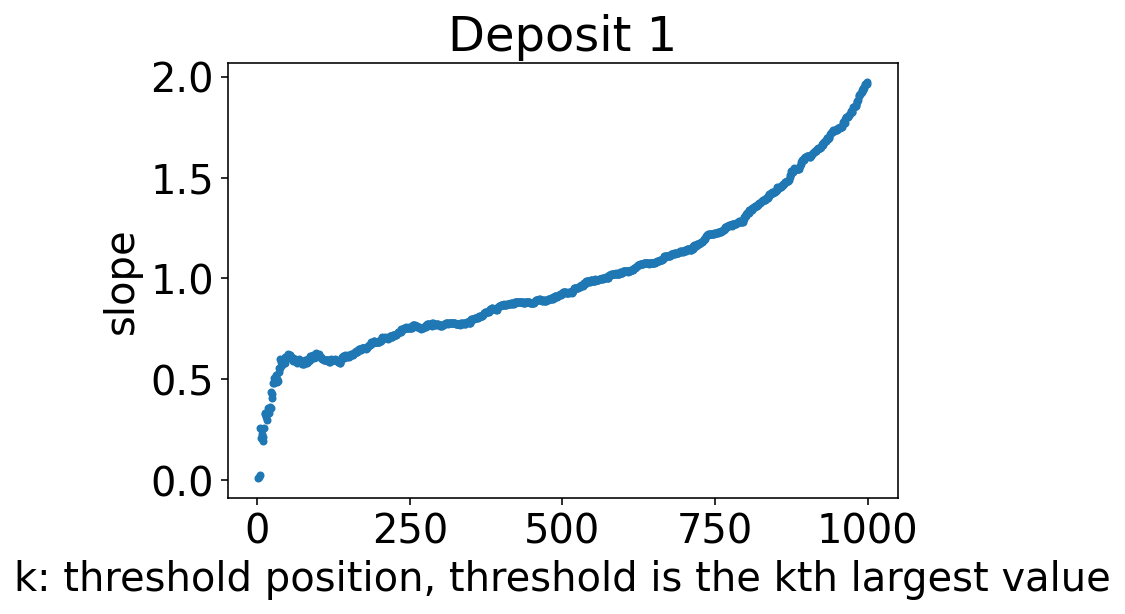

In [ ]:
## dataset 1
n = len(diamond_dataset1)
xi = meam_excess_log(diamond_dataset1)
plt.plot(np.arange(1,n+1),xi, '.')
plt.xlabel('k: threshold position, threshold is the kth largest value')
plt.ylabel('slope')
plt.title('Deposit 1')

Text(0.5, 1.0, 'Deposit 2')

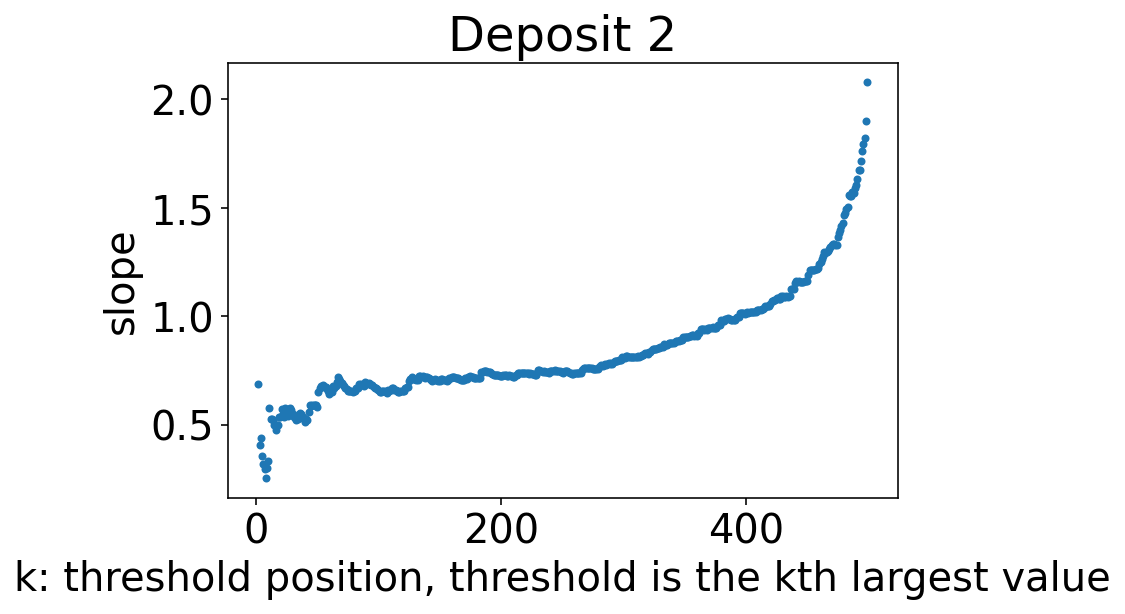

In [ ]:
## dataset 2
n = len(diamond_dataset2)
xi = meam_excess_log(diamond_dataset2)
plt.plot(np.arange(1,n+1),xi, '.') ## bias and variance trade-off
plt.xlabel('k: threshold position, threshold is the kth largest value')
plt.ylabel('slope')
plt.title('Deposit 2')

In [ ]:
# k -> u
k = 200
u = np.sort(diamond_dataset2)[-k]
print('u: '+str(u))

u: 1.096061910429152


This mean excess of logarithm only works when $\xi > 0$. 

Dataset 1: There is no stable estimation of $\xi$. This indicates $\xi \leq 0$

Dataset 2 [**Bias variance trade-off**]: When $k$ is small and the threshold $u$ is high,  our estimation has large variance because we have too few data. When $k$ is large and the threshold $u$ is low,  our estimation has large bias because we violate limit criterion. We can read off $\xi \approx 0.65$ in the middle of the plot, from k = 50 to k = 200, where bias and variance are balanced. So dataset 2 is having a longer and thicker tail. 


### Method 2: Pareto Quantile plot ($\xi > 0$)

Another way to estimate $\xi$ is Pareto Quantile plot, recall what we have learnt in the first notebook:

There is a linear relationship between $-\log(P(X> x))$ and $\log(x)$, if $X$ is Pareto distributed. 

Therefore, test whether $\xi >0$ equals to test whether $X$ is Pareto distributed. 

*   Quantile plot: $$ \left(-\log(\frac{k}{n+1}), \log(X_k^*) \right)$$
$X$ is sorted the same way as in Method 1. $n$ is the sample size of our dataset. 
*   The slope of the linear line is $\xi$ or $1/\alpha$, $\alpha$ is the shape parameter in Pareto distribution. 

Let's do Pareto Quantile plot for our two deposits:


In [ ]:
def pareto_quantile(data):
    data = np.sort(data)[::-1]
    n = len(data)
    P_X_larger_x = np.arange(1,n+1)/(n+1)
    fig = plt.figure()
    plt.plot(-np.log(P_X_larger_x), np.log(data),'.')
    plt.xlabel('Theoretical quantile: -log(k/(n+1))')
    plt.ylabel('Empirical log quantile: log($x_k^*$)')

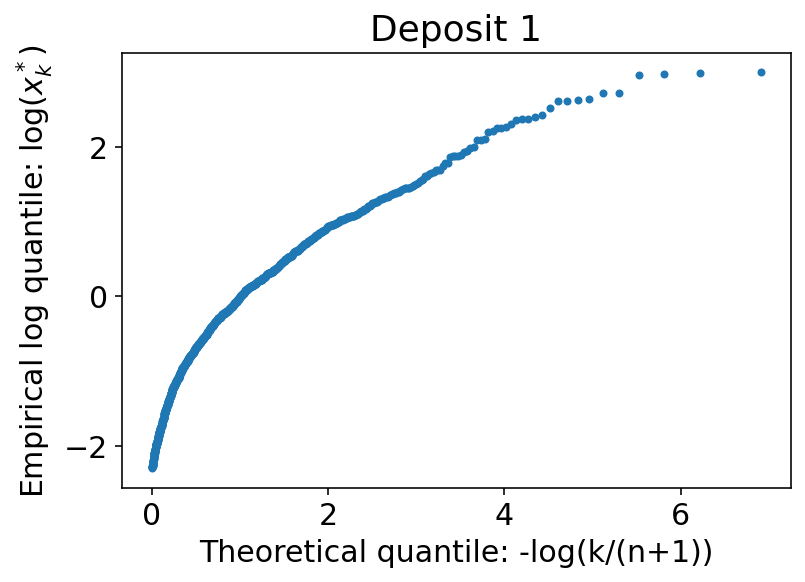

In [ ]:
matplotlib.rcParams.update({'font.size': 15})
pareto_quantile(diamond_dataset1)
plt.title('Deposit 1')
plt.locator_params(nbins=5)


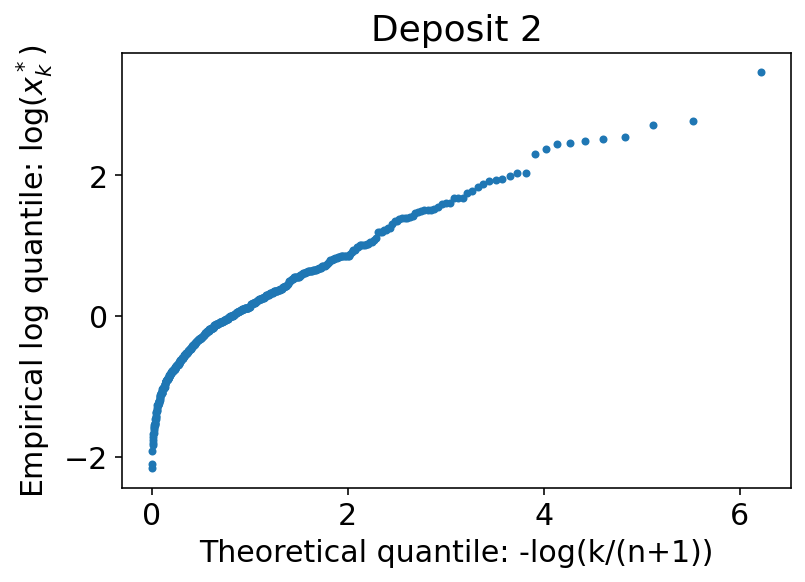

In [ ]:
pareto_quantile(diamond_dataset2)
plt.title('Deposit 2')
plt.locator_params(nbins=5)

Pareto quantile plot is linear when $\xi > 0$. 

Dataset 1: The line has leveled off, which means it is not linear at the tail. This result is corrsponding with mean excess of logarithm result: dataset 1 has $\xi \leq 0$. 

Dataset 2: The line is linear when we have larger quantiles. Therefore, dataset 2 could be modeled by Pareto distribution, where $\xi > 0$. 

### Method 3: Mean excess quantile plot (all cases of $\xi$)

So far we only address $\xi > 0$, we can estimate all cases of $\xi$ by mean excess quantile plot.  

Mean excess quantile plot addresses all cases of $\xi: \xi > 0, \xi = 0, \xi < 0$


*   $\xi$: Fit the slope of the tail of this quantile plot 
*   Mean excess function is similar to mean excess of logarithm, just without log:
$$e_X(x) = E(X-u|X>u)$$
*   Mean excess quantile plot, theoretical exponential quantiles against the log-transformed empirical mean excess: 
$$ \left(-\log(\frac{k}{n+1}), \log(\frac{1}{k} \sum_{i = 1}^k (X_i^* - X_k^*)) \right)$$



In [ ]:
## Mean excess
def meam_excess(data):
    data = np.sort(data)
    mean_excess = np.zeros(len(data))
    for k in np.arange(1,len(data)+1):
        mean_excess[k-1] = np.mean(data[(-k+1):]-data[-k])
    return mean_excess

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


Text(0.5, 1.0, 'Deposit 1')

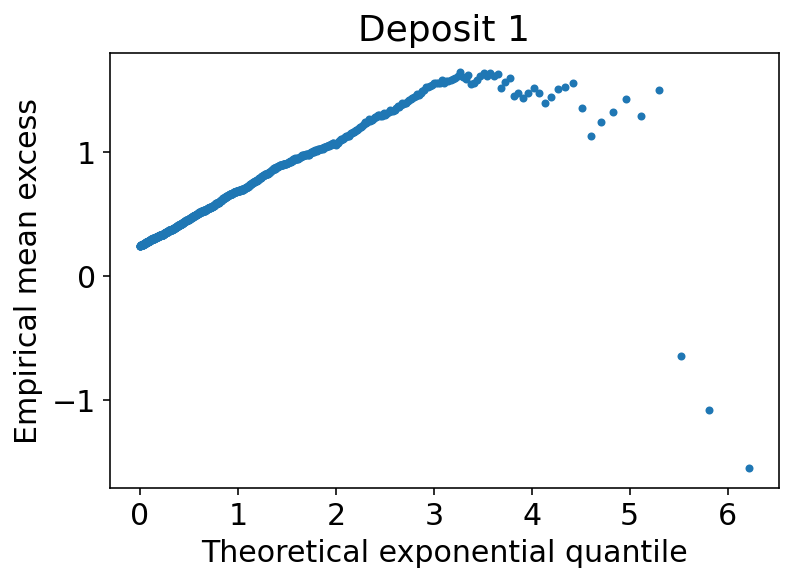

In [ ]:
## Mean excess quantile plot
n = 1000
mean_excess = meam_excess(diamond_dataset1)
log_theoretical_quantile = -np.log(np.arange(1,n+1)/(n+1))
log_mean_excess = np.log(mean_excess)
plt.plot(log_theoretical_quantile, log_mean_excess, '.')
plt.xlabel('Theoretical exponential quantile')
plt.ylabel('Empirical mean excess')
plt.title('Deposit 1')

Fit a linear regression on the tail:

We can estimate $\xi$ from the **a simple linear regression on the tail of mean excess quantile plot**. 

Let's say we use the tail points, from 10th to 50th data points:

In [ ]:
## Fit a linear regression
tail_start_k = 10
tail_end_k = 50
reg = LinearRegression().fit(log_theoretical_quantile[(tail_start_k+1):(tail_end_k+1)].reshape(-1,1), log_mean_excess[(tail_start_k+1):(tail_end_k+1)].reshape(-1,1))

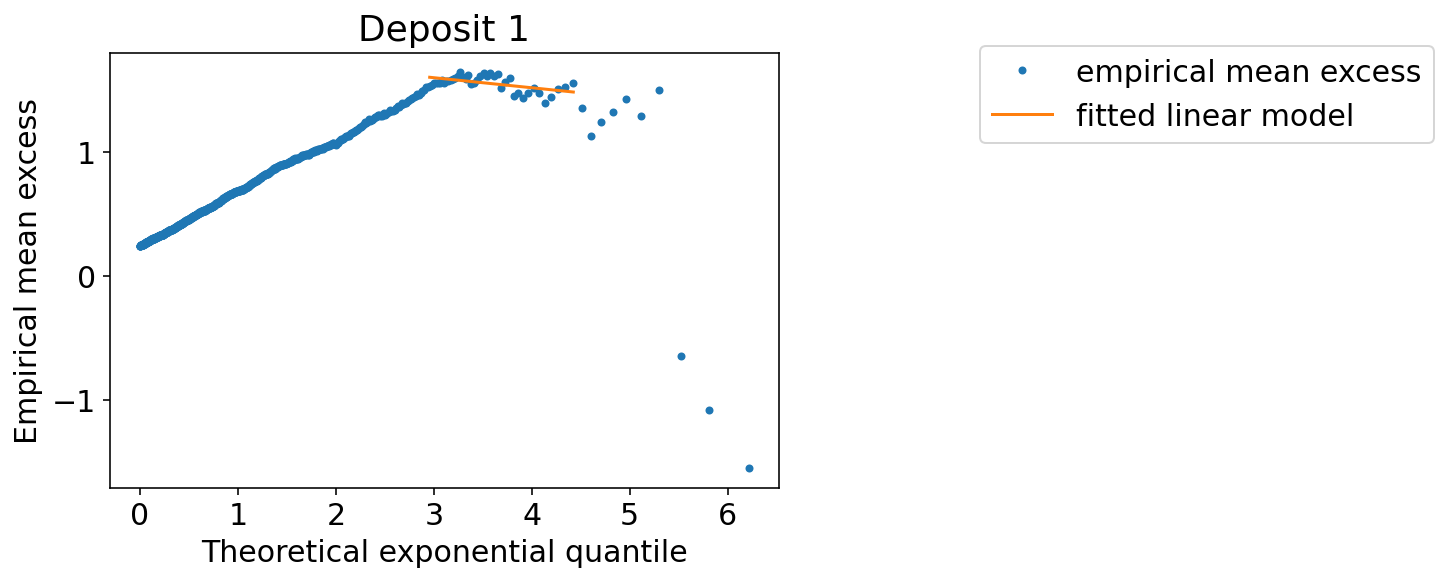

In [ ]:
## Plot fitted result
plt.plot(log_theoretical_quantile, log_mean_excess, '.', label = 'empirical mean excess') 
plt.plot(np.array([log_theoretical_quantile[tail_end_k+1],log_theoretical_quantile[tail_start_k+1]],),
         reg.predict(np.array([log_theoretical_quantile[tail_end_k+1],log_theoretical_quantile[tail_start_k+1]]).reshape(-1,1)), label = 'fitted linear model')
plt.xlabel('Theoretical exponential quantile')
plt.ylabel('Empirical mean excess')
plt.title('Deposit 1')
plt.legend()
plt.legend(bbox_to_anchor=(2, 1.05))

In [ ]:
## Estimated xi
xi_hat = reg.coef_[0][0]
print('Estimate xi of Deposit 1: '+str(xi_hat))

Estimate xi of Deposit 1: -0.08115495951531793


Note here we can change the tail points to fit the regression. Therefore, fitting $\xi$ could be very subjective. 

**Exercise**: Should we use all tail points, start from $k = 1$? Can you give your reasoning? Think about what we learned on the bias-variance tradeoff for threshold selection. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Deposit 2')

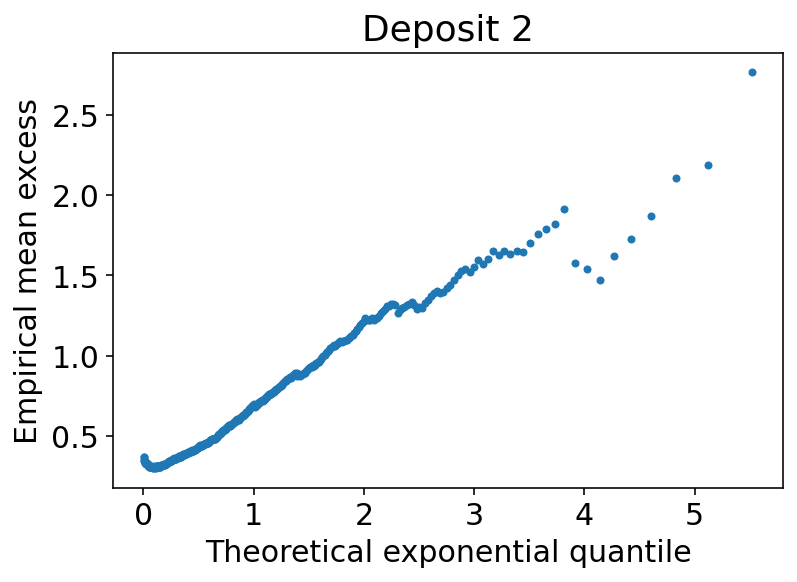

In [ ]:
n = 500
mean_excess = meam_excess(diamond_dataset2)
log_theoretical_quantile = -np.log(np.arange(1,n+1)/(n+1))
log_mean_excess = np.log(mean_excess)
plt.plot(log_theoretical_quantile, log_mean_excess, '.')
plt.xlabel('Theoretical exponential quantile')
plt.ylabel('Empirical mean excess')
plt.title('Deposit 2')

In [ ]:
## Fit a linear regression
tail_start_k = 10
tail_end_k = 50
reg = LinearRegression().fit(log_theoretical_quantile[(tail_start_k+1):(tail_end_k+1)].reshape(-1,1), log_mean_excess[(tail_start_k+1):(tail_end_k+1)].reshape(-1,1))

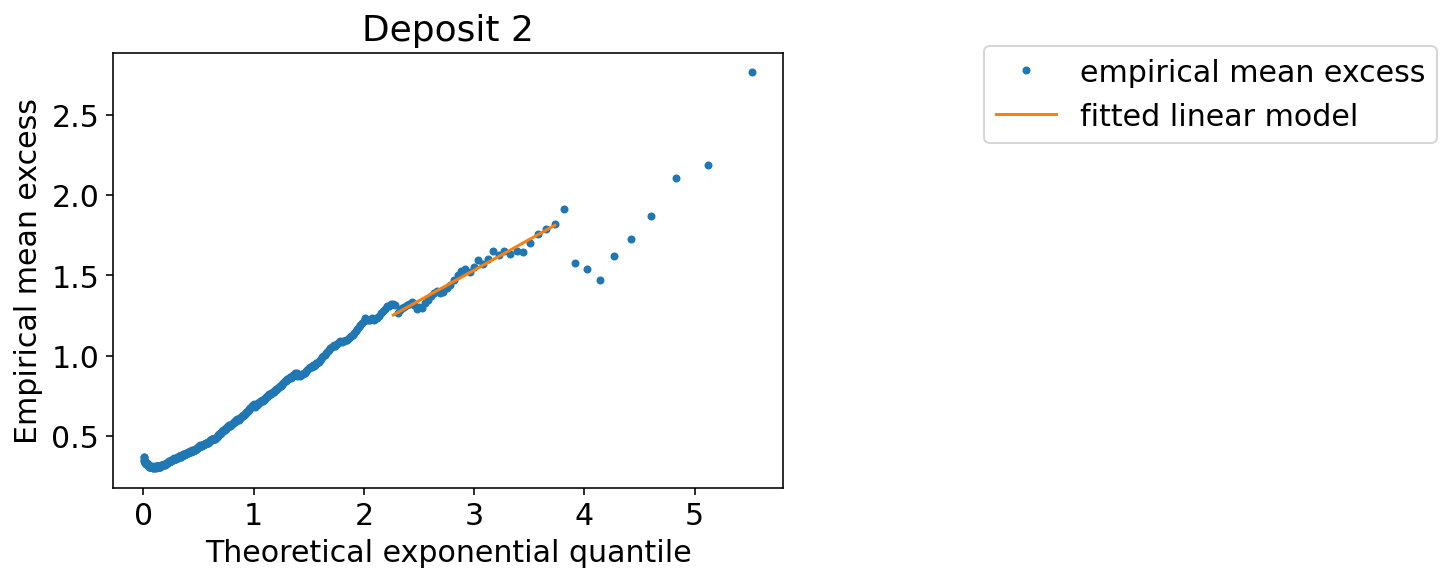

In [ ]:
## Plot fitted result
plt.plot(log_theoretical_quantile, log_mean_excess, '.', label = 'empirical mean excess') 
plt.plot(np.array([log_theoretical_quantile[tail_end_k+1],log_theoretical_quantile[tail_start_k+1]],),
         reg.predict(np.array([log_theoretical_quantile[tail_end_k+1],log_theoretical_quantile[tail_start_k+1]]).reshape(-1,1)), label = 'fitted linear model')
plt.xlabel('Theoretical exponential quantile')
plt.ylabel('Empirical mean excess')
plt.title('Deposit 2')
plt.legend(bbox_to_anchor=(2, 1.05))

In [ ]:
## Estimated xi
xi_hat = reg.coef_[0][0]
print('Estimate xi of Deposit 2: '+str(xi_hat))

Estimate xi of Deposit 2: 0.3812589349403022


Now we can tell that:

*   Dataset 2 clearly shows heavy tail distribution, with positive $\xi$. The estimated extreme value index $\xi \approx 0.3$

*   Dataset 1 has the slope $\xi \leq 0$. The estimated extreme value index $\xi \approx -0.1$



We have estimated the extreme value index for both deposits. This extreme value index captures the main feature of a skew distribution. 

Now can you estimate which deposit is more promising for higher profit, if we mine 100,000 stones? Can you quantitatively provide your way of reasoning? 

### Summary of Peaks Over Threhold
*    Generalized Pareto Distribution reflects the theoretical distribution of peaks over threshold.
*   Peak over threshold use more data than Block maxima, because it focus on thresholding instead of maximizing. However, POT requires a balance between bias and variance when selecting threshold $u$. 

## Fit with different possible models

Let's use Extreme Value Theory and fit exceedances of diamond datasets. 

We would like to find huge diamonds (> 40 ct) in diamond deposits. How many stones on average we need to mine to find such stone? What's probability of getting > 40 ct diamonds? 

### Fit exceedances to Generalized Pareto distribution, with different thresholds

Let's fit distribution of exceedances on dataset1. We first pick threshold $u = 5$. Then fit the Generalized Pareto distribution to the exceedances:

In [ ]:
## Load scipy module
from scipy.stats import lognorm
from scipy.stats import pareto
from scipy.stats import genpareto

In [ ]:
fitted_dataset = diamond_dataset1

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


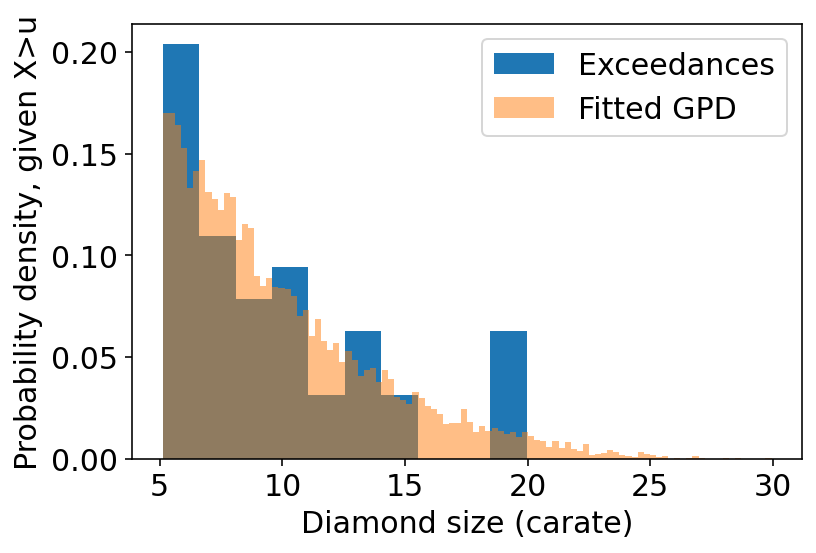

In [ ]:
## thresholding and fitting GPD
u = 5
xi, mu, sigma = genpareto.fit(fitted_dataset[fitted_dataset>u]-u)
plt.hist(diamond_dataset1[diamond_dataset1>u], density  = True, label = 'Exceedances')
plt.hist(genpareto.rvs(xi, mu, sigma, size = 10000)+u,bins = 100, density  = True,alpha = 0.5,label = 'Fitted GPD')

plt.xlabel('Diamond size (carate)')
plt.ylabel('Probability density, given X>u')
plt.legend()

In [ ]:
print('xi:'+str(xi))

xi:-0.2017143347526344


$\xi$ is less than 0. We have a shorter tail and limited upper bound for diamond deposit 1. 

Then the probability of conditional distribution $P(X> x|X>u) = P(X> u+y|X>u) = 1-GPD(y)$, $x = 40$ carat is:

In [ ]:
(1-genpareto.cdf(40-u, xi, mu, sigma))

0.0

The probability of stones larger than $u = 5, P(X>u)$ is

In [ ]:
np.mean(fitted_dataset>u)

0.043

Then we have $$P(X>x) = P(X> x|X>u) P(X>u) = 0*0.043 = 0$$

0 probability gets > 40 carat stones. 

So this fitting tells us we have no > 40 carat diamonds, no matter how many stones we mine. 

What if we use different thresholds? Is $u = 5$ optimal? Let's try different thresholds:

In [ ]:
fitted_dataset = diamond_dataset1

u_list = np.arange(1,10,0.5)
xi_list = np.zeros(len(u_list))
huge_diamond_40_carat_prob = np.zeros(len(u_list))
for i, u in enumerate(u_list):
    xi, mu, sigma = genpareto.fit(fitted_dataset[fitted_dataset>u]-u)
    xi_list[i] = xi
    huge_diamond_40_carat_prob[i] = (1-genpareto.cdf(40-u,xi,mu,sigma))*np.mean(fitted_dataset>u)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Text(0.5, 0, 'Threshold u (carat)')

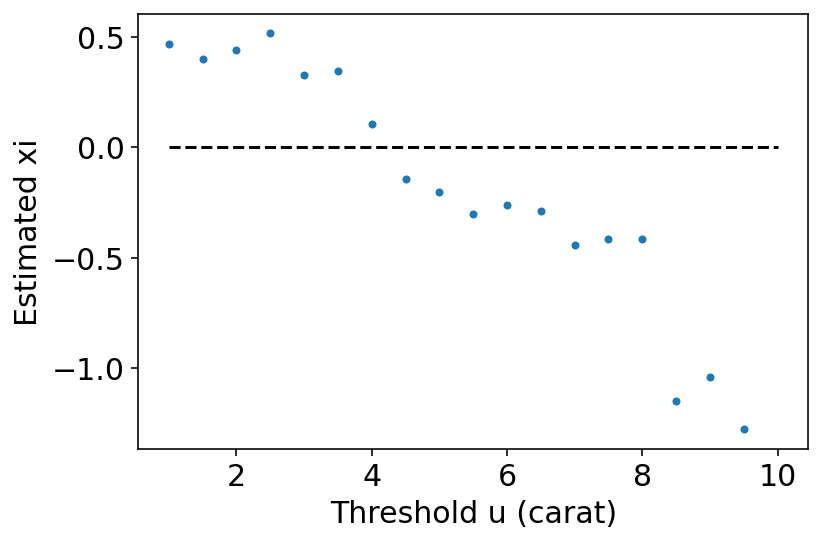

In [ ]:
plt.plot(u_list,xi_list,'.')
plt.hlines(y = 0, xmin = 1, xmax = 10, linestyles = 'dashed')
plt.ylabel('Estimated xi')
plt.xlabel('Threshold u (carat)')

Text(0.5, 0, 'Threshold u (carat)')

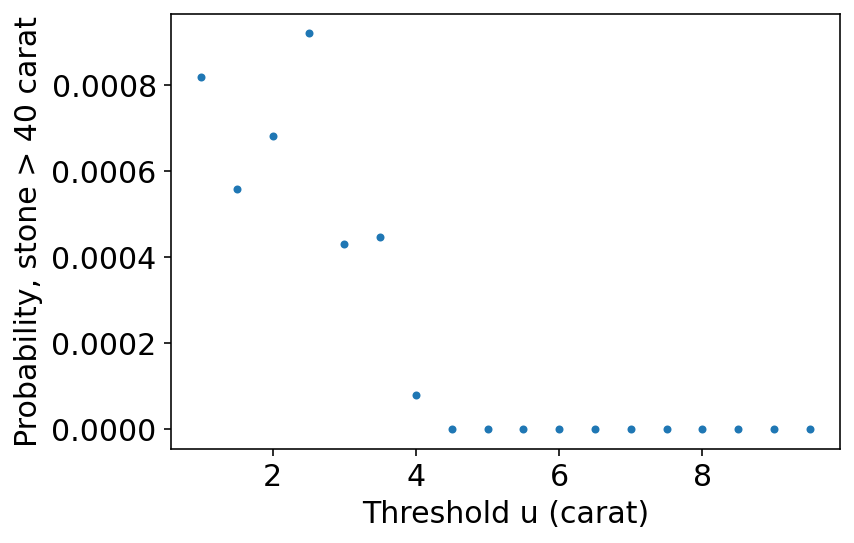

In [ ]:
plt.plot(u_list,huge_diamond_40_carat_prob,'.')
plt.ylabel('Probability, stone > 40 carat')
plt.xlabel('Threshold u (carat)')

Our threshold should be between 4 and 8 (bias variance trade off). And we are still having $\xi \leq 0$, 0 or ~5e-05 probability to find stones > 40 carat. 

What if we do not fit the exceedances by GPD, just fit long-tail distributions we learned in last notebook? Log-normal? Pareto? 

### Fit log-normal distribution

In [ ]:
std, _, exp_mu = lognorm.fit(fitted_dataset,floc = 0)

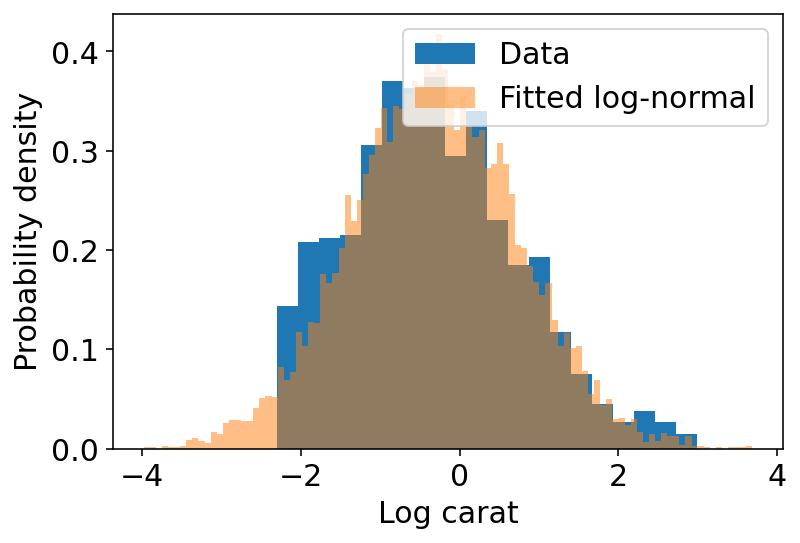

In [ ]:
plt.hist(np.log(fitted_dataset), density  = True, label = 'Data',bins = 20)
plt.hist(np.log(lognorm.rvs(std, 0, exp_mu, size = 10000)),bins = 100, density  = True,alpha = 0.5,label = 'Fitted log-normal')
plt.xlabel('Log carat')
plt.ylabel('Probability density')
#plt.xlim(0,50)
plt.legend()

In [ ]:
print('Probability > 40 carat: '+str(1-lognorm.cdf(40 ,std, 0, exp_mu)))

Probability > 40 carat: 9.045626935832995e-05


In theory, log normal distribution has $\xi = 0$, which means has longer tail than GPD $\xi < 0$ case. 

### Fit Pareto distribution

In [ ]:
b, _,scale = pareto.fit(fitted_dataset,floc = 0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


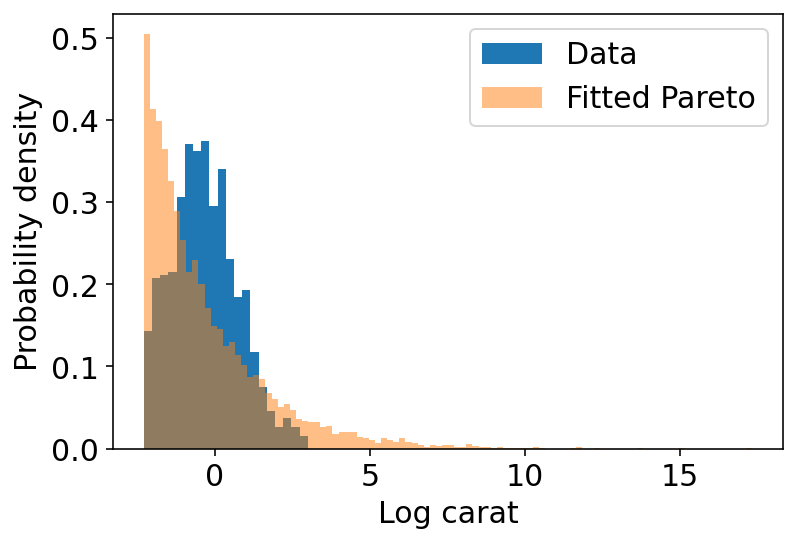

In [ ]:
plt.hist(np.log(fitted_dataset), density  = True, label = 'Data',bins = 20)
plt.hist(np.log(pareto.rvs(b, 0, scale, size = 10000)),bins = 100, density  = True,alpha = 0.5,label = 'Fitted Pareto')
plt.xlabel('Log carat')
plt.ylabel('Probability density')
plt.legend()

In [ ]:
print('Probability > 40 carat: '+str(1-pareto.cdf(40, b, 0, scale)))

Probability > 40 carat: 0.04810781220850613


Pareto distribution has $\xi > 0$. It has longer and thicker tail than previous two fitted models. 

### Compare all fitted models

In [ ]:
u = 5
xi, mu, sigma = genpareto.fit(fitted_dataset[fitted_dataset>u]-u)
a = plt.hist(np.log(genpareto.rvs(xi, mu, sigma, size = 10000)+u),bins = 100, density= True,alpha = 0.5,label = 'Fitted GPD')
plt.close()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


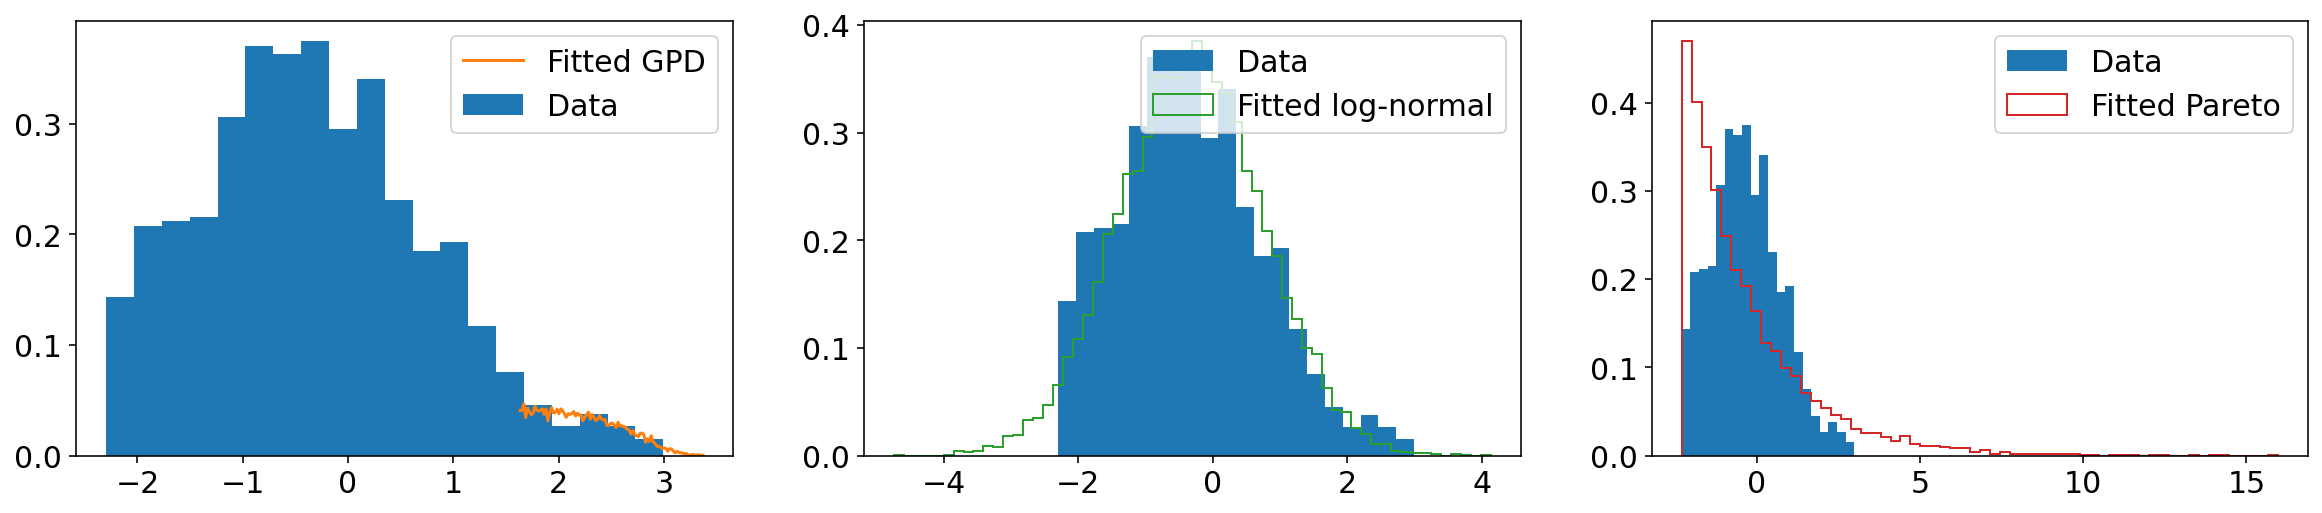

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20,4))
fig.suptitle('')
ax1.hist(np.log(fitted_dataset), density  = True, label = 'Data',bins = 20)
ax1.plot(a[1][:-1],a[0]*np.mean(fitted_dataset>u),color ='C1',label = 'Fitted GPD')

ax1.legend()
ax2.hist(np.log(fitted_dataset), density  = True, label = 'Data',bins = 20)
ax2.hist(np.log(lognorm.rvs(std, 0, exp_mu, size = 10000)),bins = 60, density  = True,alpha = 1,label = 'Fitted log-normal',color = 'C2',histtype='step',fill=False)
ax2.legend()

ax3.hist(np.log(fitted_dataset), density  = True, label = 'Data',bins = 20)
ax3.hist(np.log(pareto.rvs(b, 0, scale, size = 10000)),bins = 60, density  = True,alpha = 1,label = 'Fitted Pareto',histtype='step',color = 'C3',fill=False)
ax3.legend()

plt.show()

**Exercise**: Can you fit models to deposit 2? Again, estimate the probability of finding > 40 carat diamonds. 

## Summary

In this notebook, we introduce extreme value theory to model
tails of long-tailed distributions. In practice, we use limited collected data to infer our tail distributions, and extrapolate this distribution to predict the extremes we may have never seen. 

There are two consistent behavior for extreme values. We can fit GEV on maxima or GPD on exceedances. Extreme value index $\xi$ distinguishes behaviors of extremes.
![GEV_GPD.png](https://drive.google.com/uc?export=view&id=16ZTdgiY2XDkP4QC2Sfz8DK9qqFTY2Ldu)

Source: [An introduction to extreme value statistics](https://tu-dresden.de/mn/ressourcen/dateien/large-fluctuations-extreme-events/dateien/Moloney_part1.pdf?lang=en)








Several diagnostic plots have been introduced to estimate extreme value index and discriminate different tail distributions. We can easily estimate extreme value index $\xi$ using regression on the tail of mean excess quantile plot. 

Next practice notebook, we will cover a volcano dataset, and investigate frequency of occurence of extremes, i.e. > 5 VEI magnitude eruption will occur on average how many years. 